#1. 시각화를 위한 라이브러리 설치

In [1]:
#시각화를 위한 파일 설치
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


#2. 모델 만들기

##2.1 데이터 추출
> iris 데이터를 읽어 들여 훈련데이터와 테스트 데이터를 7:3으로 분리하여 추출하시오 

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=62)
print(len(x_train), len(x_test))

105 45


> 훈련 데이터와 검증 데이터를 받기 위해 train_test_split 함수를 이용한다. 에디터, 결과 데이터, 검증데이터의 비율, 랜덤값 순으로 파라미터를 입력하면 되며, 반환값은 훈련 데이터, 검증 데이터, 훈련 결과 데이터, 검증 결과 데이터 순으로 반환된다.

##2.2 모델 학습

In [4]:
from sklearn.tree import DecisionTreeClassifier
#모델 로드
dt_clf = DecisionTreeClassifier()

#학습을 통한 모델 생성
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##2.3 시각화

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)


> export_graphviz 함수는 그래프로 시각화 하기위한 출력 파일을 생성한다.

- decision_tree : 첫 인자로, 학습이 완료된 모델이다. dt_clf
- out_file : 그래프를 그릴 파일명을 지정한다. tree.dot  
- class_names : target_name을 지정한다. iris.target_names 
- feature_names: feature_name을 지정한다. iris.feature_names 
- impurity : 기본값은 False이며, True일 경우 노드의 클래스가 구분되도록 색을 칠한다. 
- filled : True시 불순율 표시(gini)


In [9]:
ls

sample_data/  tree.dot


> ls는 리눅스 명령어로 현재 경로의 디렉토리 및 파일을 보여준다.
(코렙은 리눅스 os기반이기 때문에 가능하다.)

> ls로 tree.dot이라는 파일이 생긴 것을 볼 수 있다.

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="petal width (cm) <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [35, 38, 32]\nclass = versicolor", fillcolor="#f7fefa"] ;
1 [label="gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\ngini = 0.496\nsamples = 70\nvalue = [0, 38, 32]\nclass = versicolor", fillcolor="#e0fbeb"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = versicolor", fillcolor="#49e78b"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor", fillcolor="#39e581"] ;
3 -> 4 ;
5 [label="sepal length (cm) <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica", fillcolor="#ab7bee"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor"

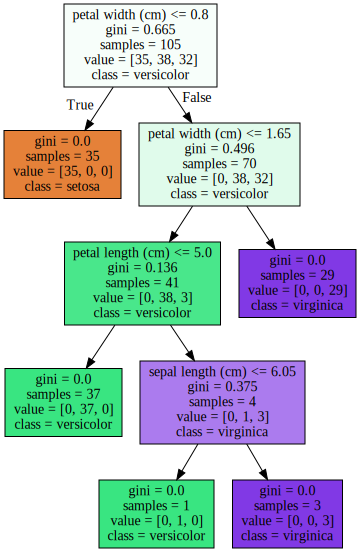

In [12]:
import graphviz
with open('tree.dot') as f:
  dot_graph = f.read()
  print(dot_graph)

graphviz.Source(dot_graph)

> 각 노드별로 다음과 같은 의미를 갖는다.
- 첫 번째 나타나는 조건식은 다음 내용을 분류하기 위한 기준이 된다.
- gini는 여러 종류의 데이터가 섞여 있는 비율을 의미하며 0이면 하나의 종류만 있는 것이다.
- sample은 데이터의 개수를 의미한다. 
- value는 데이터의 종류별 건수를 의미한다.
- class는 최종 분류 결과이다.

> 루트 노드에서 꽃잎의 폭이 0.8이하이면 setosa이다.

> 두 번째 노드에서 꽃잎의 폭이 1.65초과이면 vriginica이다.

> 세 번째 노드에서 꽃잎의 길이가 5이하이면 versicolor이다. 5초과인 경우 samples의 수가 4이므로 더 분류를 안하는 것이 좋다. 더 나뉘게 되면 과적합되어 예측률이 떨어 질 수 있다.

위 내용을 기반으로 잘 분석하여 적당한 파라미터를 지정하고 성능 높은 모델을 생성하면 된다.


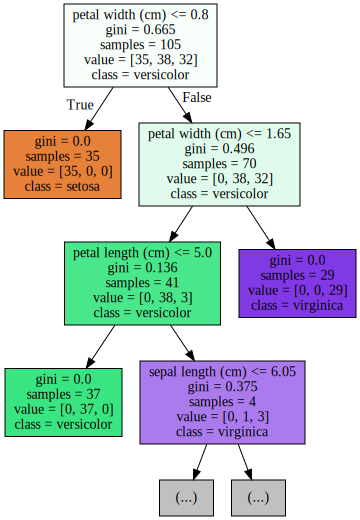

In [17]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot',
                class_names=iris.target_names,
                feature_names=iris.feature_names,
                impurity=True,
                filled=True,
                #max_depth의 수치를 낮춤으로써 과적합을 해소할 수 있다.
                max_depth=3)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

##2.4 feature 중요도

###2.4.1 feature중요도 확인

In [13]:
dt_clf.feature_importances_

array([0.02148118, 0.        , 0.05815636, 0.92036246])

> 제일 마지막 feature가 가장 중요하게 연산되었다.

> feature_importances_는 feature의 중요도를 뜻하는 것으로 수치가 클 수록 중요한  feature이다. 중요도가 높은 feature를 우선적으로 루트에서 분류하고, 점차 낮은 feature로 분류를 마무리하게 된다.

In [15]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
  print(name, round(value, 2))

sepal length (cm) 0.02
sepal width (cm) 0.0
petal length (cm) 0.06
petal width (cm) 0.92


In [ ]:
from sklearn.model_selection import GridSearchCV

#의사결정트리, 랜덤 포레스트의 파라미터
parameters = {
    'max_depth' : [2, 3, 4, 5],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 8]
}

grid_clf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_clf.fit(x_train, y_train)

In [22]:
print('최적의 파라미터 : ', grid_clf.best_params_)
print('최고의 정확도 : ', grid_clf.best_score_)

최적의 파라미터 :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 4}
최고의 정확도 :  0.9714285714285715
